<Axes: >

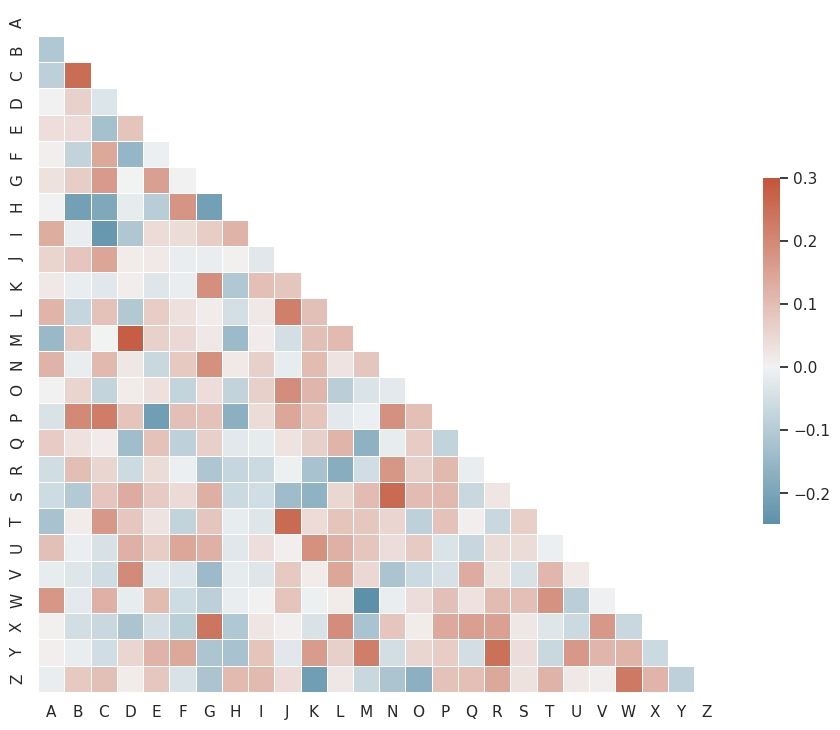

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [2]:
import pickle
import anndata as an
import scipy as sc

In [3]:
weights_io_efi = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('epithelial', 'fibroblast', 'immune').pickle", "rb")
)
weights_io_eif = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('epithelial', 'immune', 'fibroblast').pickle", "rb")
)
weights_io_fie = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('fibroblast', 'immune', 'epithelial').pickle", "rb")
)
weights_io_fei = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('fibroblast', 'epithelial', 'immune').pickle", "rb")
)
weights_io_ief = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('immune', 'epithelial', 'fibroblast').pickle", "rb")
)
weights_io_ife = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('immune', 'fibroblast', 'epithelial').pickle", "rb")
)

In [4]:
def _to_list(weights):
    w = []
    w.append([x[0] for x in weights["epithelial"]])
    w.append([x[0] for x in weights["fibroblast"]])
    w.append([x[0] for x in weights["immune"]])
    w.append([x[1] for x in weights["epithelial"]])
    w.append([x[1] for x in weights["fibroblast"]])
    w.append([x[1] for x in weights["immune"]])
    w.append([x[2] for x in weights["epithelial"]])
    w.append([x[2] for x in weights["fibroblast"]])
    w.append([x[2] for x in weights["immune"]])
    return w

In [5]:
efi = _to_list(weights_io_efi)
eif = _to_list(weights_io_eif)
fie = _to_list(weights_io_fie)
fei = _to_list(weights_io_fei)
ief = _to_list(weights_io_ief)
ife = _to_list(weights_io_ife)

In [101]:
sc.stats.spearmanr([x[2] for x in weights_io_fei["immune"]], [x[2] for x in weights_io_eif["immune"]])

SignificanceResult(statistic=-0.2611602369427734, pvalue=0.06696488015124236)

In [7]:
data_frame_to_plot = pd.DataFrame({"efi MCP0 immune":efi[0], "eif MCP0 fibro ":eif[1], "fie MCP0":fie[0], "fei MCP0":fei[0], "ief MCP0":ief[0], "ife MCP0":ife[0], "efi MCP1":efi[1], "eif MCP1":eif[1], "fie MCP1":fie[1], "fei MCP1":fei[1], "ief MCP1":ief[1], "ife MCP1":ife[1], "efi MCP2":efi[2], "eif MCP2":eif[2], "fie MCP2":fie[2], "fei MCP2":fei[2], "ief MCP2":ief[2], "ife MCP2":ife[2]})

In [ ]:
data_frame_to_plot = pd.DataFrame({"weights_io_efi ":weights_io_efi["epithelial"]})

In [7]:
data_dict = {}
data_frame_to_plot = {}
for k in [0,1,2]:
#for k in [2]:
    for celltype in ["immune", "epithelial", "fibroblast"]:
        data_dict[f"eif"] = [x[k] for x in weights_io_eif[celltype]]
        data_dict[f"efi"] = [x[k] for x in weights_io_efi[celltype]]
        data_dict[f"ife"] = [x[k] for x in weights_io_ife[celltype]]
        data_dict[f"fie"] = [x[k] for x in weights_io_fie[celltype]]
        data_dict[f"fei"] = [x[k] for x in weights_io_fei[celltype]]
        data_dict[f"ief"] = [x[k] for x in weights_io_ief[celltype]]
        data_frame_to_plot[k,celltype] = pd.DataFrame(data_dict) 


In [53]:
#data_frame_to_plot_0_e = pd.DataFrame(data_dict) 
#data_frame_to_plot_0_f = pd.DataFrame(data_dict) 
#data_frame_to_plot_0_i = pd.DataFrame(data_dict) 
#data_frame_to_plot_1_e = pd.DataFrame(data_dict) 
#data_frame_to_plot_1_f = pd.DataFrame(data_dict) 
#data_frame_to_plot_1_i = pd.DataFrame(data_dict) 
#data_frame_to_plot_2_e = pd.DataFrame(data_dict) 
#data_frame_to_plot_2_f = pd.DataFrame(data_dict) 
data_frame_to_plot_2_i = pd.DataFrame(data_dict) 

In [9]:
for i in range(6):
    mask[i,i]=False

In [98]:
mask


array([[False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False, False]])

/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_17708/4248547790.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


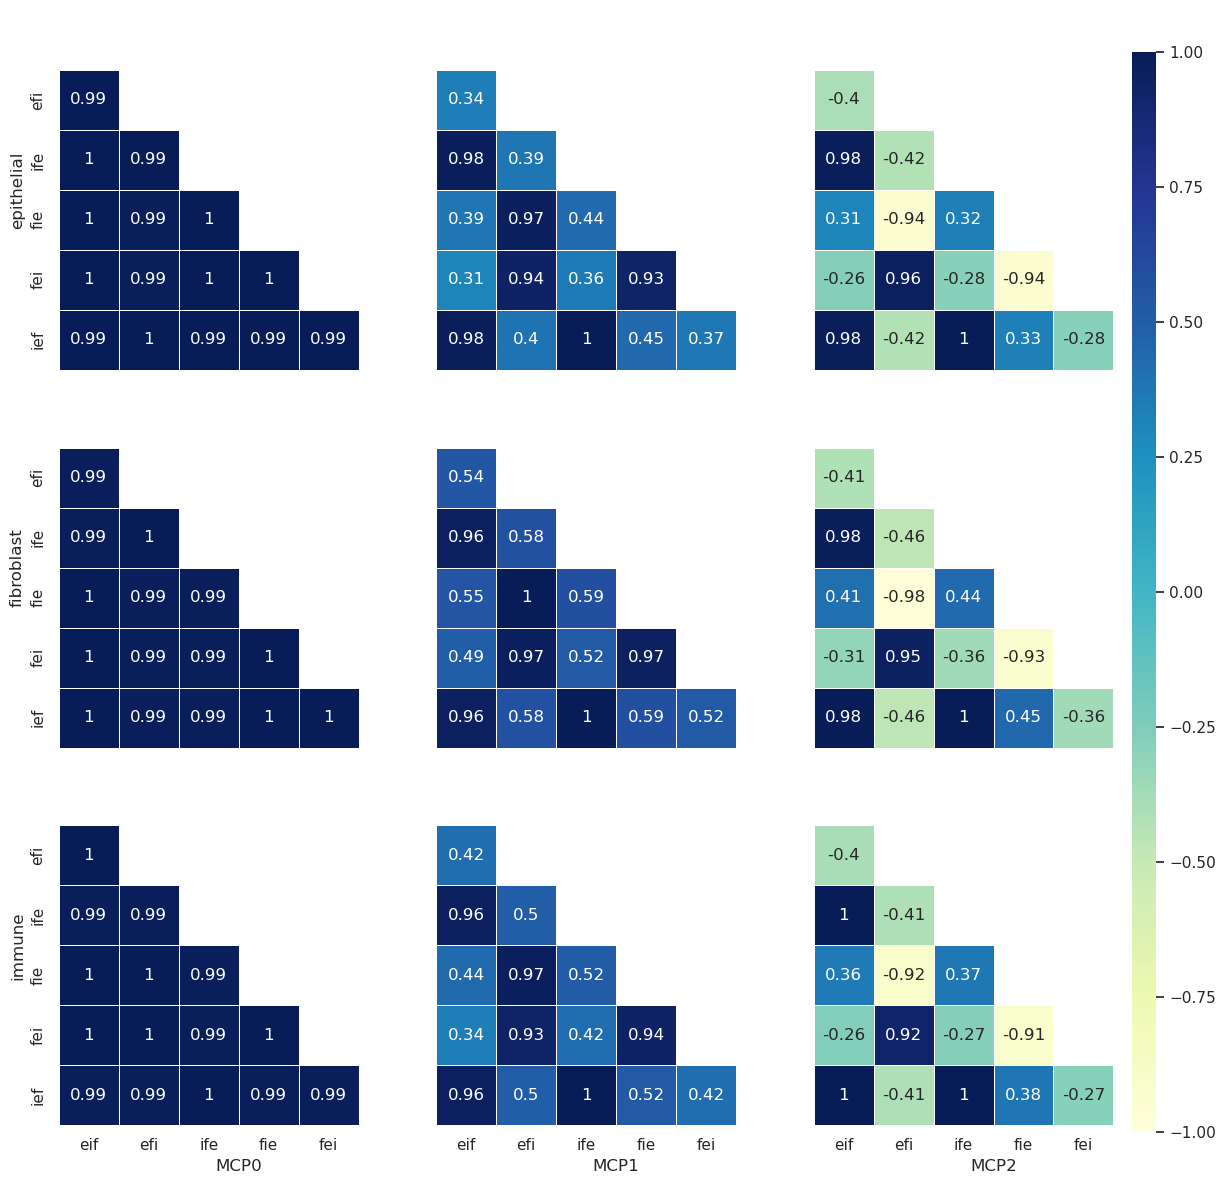

In [15]:
# Compute the correlation matrix
corr_0_0 = data_frame_to_plot[0, "epithelial"].corr(method='spearman')
corr_0_1 = data_frame_to_plot[0, "fibroblast"].corr(method='spearman')
corr_0_2 = data_frame_to_plot[0, "immune"].corr(method='spearman')
corr_1_0 = data_frame_to_plot[1, "epithelial"].corr(method='spearman')
corr_1_1 = data_frame_to_plot[1, "fibroblast"].corr(method='spearman')
corr_1_2 = data_frame_to_plot[1, "immune"].corr(method='spearman')
corr_2_0 = data_frame_to_plot[2, "epithelial"].corr(method='spearman')
corr_2_1 = data_frame_to_plot[2, "fibroblast"].corr(method='spearman')
corr_2_2 = data_frame_to_plot[2, "immune"].corr(method='spearman')


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_2_2, dtype=bool))

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
 #         square=True, linewidths=.5, cbar_kws={"shrink": .5})


ticksx = ['eif', 'efi', 'ife', 'fie', 'fei', '']
ticksy = ['', 'efi', 'ife', 'fie', 'fei', 'ief']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
cbar_ax = fig.add_axes([.95, .05, .02, .9])
#cbar_ax = fig.add_axes([.95, .05, .02, .3])


#fig.suptitle('Pairwise correaltion of sparse canonical variates with permuted input')
sns.heatmap(ax=axes[0,0],data=corr_0_0, mask=mask, center=0,
          square=True, linewidths=.5, cbar=False,annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=ticksy)
sns.heatmap(ax=axes[1,0], data=corr_0_1, mask=mask, center=0,
          square=True, linewidths=.5, cbar=False, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=ticksy)
sns.heatmap(ax=axes[2,0], data=corr_0_2, mask=mask, center=0,
          square=True, linewidths=.5, cbar=False, annot=True, cmap="YlGnBu", xticklabels=ticksx, yticklabels=ticksy)
sns.heatmap(ax=axes[0,1], data=corr_1_0, mask=mask, center=0,
          square=True, linewidths=.5, cbar=False, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
sns.heatmap(ax=axes[1,1],data=corr_1_1, mask=mask, center=0,
          square=True, linewidths=.5, cbar=False, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
sns.heatmap(ax=axes[2,1], data=corr_1_2, mask=mask, center=0,
          square=True, linewidths=.5, cbar=False, annot=True, cmap="YlGnBu", xticklabels=ticksx, yticklabels=False)
sns.heatmap(ax=axes[0,2], data=corr_2_0, mask=mask, center=0,
          square=True, linewidths=.5, cbar=False, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
sns.heatmap(ax=axes[1,2], data=corr_2_1, mask=mask, center=0,
          square=True, linewidths=.5, cbar=False, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
sns.heatmap(ax=axes[2,2], data=corr_2_2,cbar=True,cbar_ax=cbar_ax, vmin=-1, vmax=1,mask=mask, center=0,
          square=True, linewidths=.5, annot=True, cmap="YlGnBu", xticklabels=ticksx, yticklabels=False)


axes[2,0].set_xlabel('MCP0')
axes[2,1].set_xlabel('MCP1')
axes[2,2].set_xlabel('MCP2')
axes[0,0].set_ylabel('epithelial')
axes[1,0].set_ylabel('fibroblast')
axes[2,0].set_ylabel('immune')


fig.tight_layout()



In [68]:
d1 = pd.DataFrame({"efi MCP1":efi[1], "eif MCP1":eif[1], "fie MCP1":fie[1], "fei MCP1":fei[1], "ief MCP1":ief[1], "ife MCP1":ife[1]})

<Axes: >

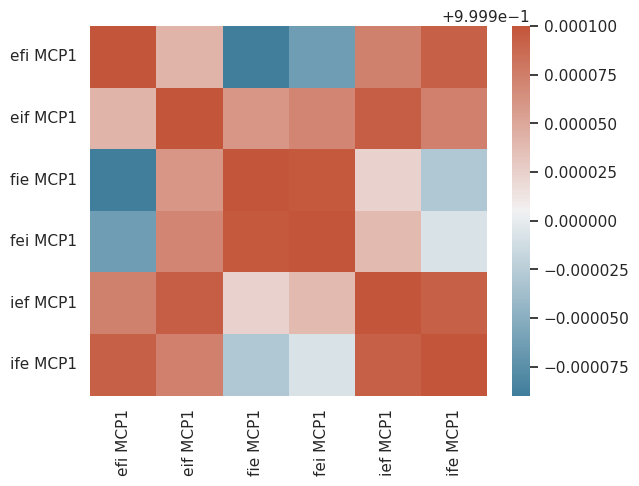

In [71]:
# Compute the correlation matrix
corr1 = d1.corr(method='spearman')

# Generate a mask for the upper triangle
mask1 = np.triu(np.ones_like(corr1, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, cmap=cmap)

#sns.heatmap(corr)

In [72]:
d2 = pd.DataFrame({"efi MCP2":efi[2], "eif MCP2":eif[2], "fie MCP2":fie[2], "fei MCP2":fei[2], "ief MCP2":ief[2], "ife MCP2":ife[2]})

<Axes: >

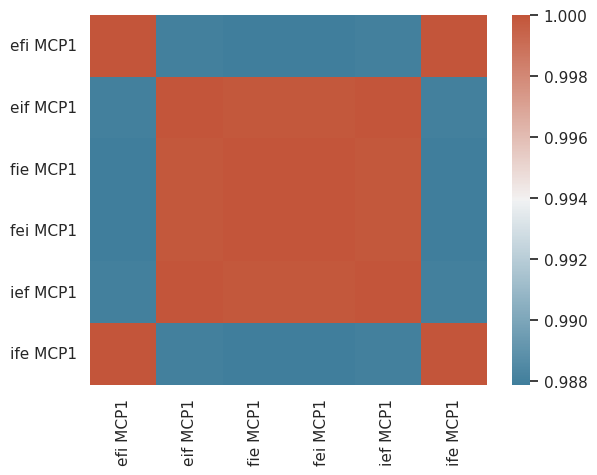

In [73]:
# Compute the correlation matrix
corr1 = d1.corr(method='spearman')

# Generate a mask for the upper triangle
mask1 = np.triu(np.ones_like(corr1, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, cmap=cmap)